<a href="https://colab.research.google.com/github/tanyabhatia/tanyabhatia/blob/bionic-vision-lab/ElectrodeImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os.path as osp
from glob import glob
import os
import re
import skimage
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from natsort import natsorted, ns
from skimage import measure
from skimage.measure import label, regionprops, regionprops_table

In [ ]:
!pip install git+https://github.com/pulse2percept/pulse2percept.git
from pulse2percept.implants import *
from pulse2percept.models import AxonMapModel
from pulse2percept.datasets import fetch_beyeler2019
#data = fetch_beyeler2019()
from pulse2percept.implants import ArgusII
argus = ArgusII(x=-2142, y=102, rot=-0.9407325, eye='RE')
#data = fetch_beyeler2019(subjects='S3')
from pulse2percept.viz import plot_argus_phosphenes
#plot_argus_phosphenes(data, argus)
import pulse2percept as p2p

  Cloning https://github.com/pulse2percept/pulse2percept.git to /tmp/pip-req-build-7zhnjby_
  Running command git clone -q https://github.com/pulse2percept/pulse2percept.git /tmp/pip-req-build-7zhnjby_
  Created wheel for pulse2percept: filename=pulse2percept-0.8.0.dev0-cp37-cp37m-linux_x86_64.whl size=2209445 sha256=2861bc79ef16d89e9665404d2b6d91324cdf6b07cbb11d874e558db0e12e0bdc
  Stored in directory: /tmp/pip-ephem-wheel-cache-nfqi8jbv/wheels/84/e5/2e/4d3addcbb30a217364144fd7499bbead3782c525a20d23419e
Successfully built pulse2percept


In [ ]:
from pulse2percept.stimuli import images

In [ ]:
from pulse2percept.utils import center_image

In [ ]:
#from pulse2percept.stimuli.images import center_image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# csvpaths = glob('gdrive/My Drive/argus_shapes_raw/%s/*/*/*_rawDataFile*.csv' % subject)
path = 'gdrive/My Drive/'
df_52001 = pd.read_csv(path + 'df_52-001.csv')
df_51009 = pd.read_csv(path+'df_51-009.csv')
df_12005 = pd.read_csv(path + 'df_12-005.csv')

In [ ]:
subject = '52-001'
df_52001 = df_52001.drop(columns='Unnamed: 0')
df_52001 = df_52001.replace(np.nan, '', regex=True)
df = df_52001

In [ ]:
# notes to self: fig size, look at argus implant electrodes
#len(imgprops) #so there is just 1 element in the image that is labeled. what does this depend on? could there be 2 labeled elements for double electrode images?

In [ ]:
imagefilepaths = glob('gdrive/My Drive/argus_shapes_raw/%s/*/*/*.bmp' % subject)

In [ ]:
paired = df[df['electrode2']!=''] #amp: 2x, 1.5x. freq: 20Hz

In [ ]:
np.set_printoptions(threshold=np. inf)

elec1 = paired['electrode1'].unique()
np.sort(elec1)

array(['A01', 'A08', 'A10', 'B07', 'C10', 'D08', 'E01', 'E04', 'E06',
       'E08', 'F01', 'F02', 'F04', 'F06', 'F08'], dtype=object)

In [ ]:
elec2 = paired['electrode2'].unique()
np.sort(elec2)

array(['A08', 'A10', 'B09', 'D07', 'D08', 'E01', 'E03', 'E08', 'E09',
       'E10', 'F04', 'F06', 'F07', 'F08', 'F10'], dtype=object)

In [ ]:
singles = df[df['electrode2']=='']
elec1_s = singles['electrode1'].unique()
np.sort(elec1_s)

array(['A01', 'A05', 'A07', 'A08', 'A10', 'B06', 'B07', 'B09', 'C04',
       'C08', 'C10', 'D03', 'D05', 'D07', 'D08', 'E01', 'E03', 'E04',
       'E05', 'E06', 'E09', 'E10', 'F01', 'F02', 'F04', 'F06', 'F07',
       'F08', 'F09', 'F10'], dtype=object)

In [ ]:
#PAIRED ELECTRODES
pairs = paired.groupby(['electrode1','electrode2']).size().reset_index().rename(columns={0:'count'})

#need to check: do we have singles for these electrodes?
#We don't have single E08 data, so will omit from pairs.


In [ ]:
pairs = pairs[pairs['electrode1']!='E08']
pairs = pairs[pairs['electrode2']!='E08']
pairs
#20 unique electrode pairs.

,electrode1,electrode2,count
0,A01,E01,20
1,A08,D08,15
3,A10,E10,20
4,A10,F10,20
5,B07,A08,25
6,B07,B09,20
7,B07,D07,20
8,C10,F10,20
9,D08,F08,16
10,E01,E03,24


In [ ]:
image_list = []
for filename in paired['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
#sgl_df['image'] = image_list

In [ ]:
paired['image'] = image_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
paired = paired.reset_index()

In [ ]:
area_list = []
for img in paired['image']:
  area_list.append(np.sum(img>0))
paired['area'] = area_list

In [ ]:
paired[paired['electrode2']=='E08']

,index,image,electrode1,electrode2,vid_level,freq,pulse_dur,pulse_width,imgpath,amp,subject,area
58,102,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,698
59,103,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,756
60,104,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,762
61,105,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,890
137,231,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,1030
138,232,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,1050
139,233,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,4503
140,234,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,1074
141,235,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,7243
254,690,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A08,E08,30,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201004...,1.5xTh,52-001,35


In [ ]:
paired['area'][0]

3374

In [ ]:
np.sum(paired['image'][0] > 0)

3374

In [ ]:
elec1 = []
elec2 = []
elecs = []
for e1 in pairs['electrode1']:
  elec1.append(e1)

for e2 in pairs['electrode2']:
  elec2.append(e2)

elecs = elec1 + elec2

In [ ]:
#all the single electrodes we want (since these exist in either electrode1 or electrode 2 for the paired df)
elec_arr = np.unique(elecs)
elec_arr

array(['A01', 'A08', 'A10', 'B07', 'B09', 'C10', 'D07', 'D08', 'E01',
       'E03', 'E04', 'E06', 'E09', 'E10', 'F01', 'F02', 'F04', 'F06',
       'F07', 'F08', 'F10'], dtype='<U3')

In [ ]:
len(elec_arr)

21

In [ ]:
sgl_df = singles[singles['electrode1'].isin(elec_arr)]

In [ ]:
image_list = []
for filename in sgl_df['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
sgl_df['image'] = image_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#singles
area_list = []
for img in sgl_df['image']:
  area_list.append(np.sum(img>0))
sgl_df['area'] = area_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
sgl_df

,image,electrode1,electrode2,vid_level,freq,pulse_dur,pulse_width,imgpath,amp,subject,area
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A01,,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,2276
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A01,,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,2358
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A01,,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,2283
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A01,,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,2109
9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",A10,,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001,7751
...,...,...,...,...,...,...,...,...,...,...,...
1283,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",E09,,30,60,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201008...,1.25xTh,52-001,291
1284,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",E09,,30,60,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201008...,1.25xTh,52-001,218
1285,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",E09,,30,60,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201008...,1.25xTh,52-001,76
1286,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",E09,,30,60,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201008...,1.25xTh,52-001,276


In [ ]:
sgl_df=sgl_df.reset_index()

In [ ]:
sgl_df_amp = sgl_df[(sgl_df['amp']=='1.5xTh') | (sgl_df['amp']=='2xTh')]
sgl_dff = sgl_df_amp[sgl_df_amp['freq']==20]

In [ ]:
sgl_area = sgl_dff.groupby(["electrode1", "electrode2", "amp"])['area'].mean().reset_index()

In [ ]:
pr_area = paired.groupby(["electrode1", "electrode2", "amp"])["area"].mean().reset_index()

In [ ]:
sgl_area[sgl_area['electrode1']=='A01']['area']

0    2176.444444
1    3986.928571
Name: area, dtype: float64

In [ ]:
sgl_15 = sgl_area[sgl_area['amp']=='1.5xTh'].reset_index()

In [ ]:
sgl_2 = sgl_area[sgl_area['amp']=='2xTh'].reset_index()

In [ ]:
sgl_2

,index,electrode1,electrode2,amp,area
0,1,A01,,2xTh,3986.928571
1,3,A08,,2xTh,1304.941176
2,5,A10,,2xTh,5810.166667
3,7,B07,,2xTh,3146.000000
4,9,B09,,2xTh,11012.500000
5,11,C10,,2xTh,6758.300000
6,13,D07,,2xTh,438.100000
7,15,D08,,2xTh,1280.700000
8,17,E01,,2xTh,2487.523810
9,19,E03,,2xTh,13422.571429


In [ ]:
pr_15 = pr_area[pr_area['amp']=='1.5xTh'].reset_index()


In [ ]:
pr_2 = pr_area[pr_area['amp']=='2xTh'].reset_index()

In [ ]:
arealist = []

pr_15 = pr_area[pr_area['amp']=='1.5xTh'].reset_index()
sgl_15 = sgl_area[sgl_area['amp']=='1.5xTh'].reset_index()
ar1_list = []
ar2_list = []
sum=[]
for i in range(len(pr_15)):
  e1 = pr_15['electrode1'][i]
  e2 = pr_15['electrode2'][i]
  ar1 = 'NA'
  ar2 = 'NA'
  for elec1 in sgl_15['electrode1']:
    if(elec1==e1):
      ar1 = float((sgl_15[sgl_15['electrode1']==elec1]['area']))
      #print(ar1)
    if(elec1==e2):
      ar2 = float((sgl_15[sgl_15['electrode1']==elec1]['area']))
      #print(ar2)
  ar1_list.append(ar1)
  ar2_list.append(ar2)
  if (ar1=='NA' or ar2=='NA'):
    sum.append('NA')
  else: (sum.append(ar1 + ar2))
print(ar1_list)
print(ar2_list)
print(sum)
pr_15['area1'] = ar1_list
pr_15['area2'] = ar2_list
pr_15['sum'] = sum

[2176.4444444444443, 869.6, 869.6, 4299.0, 4299.0, 1115.8, 1115.8, 1115.8, 1780.8, 511.6, 1992.3333333333333, 'NA', 937.7333333333333, 937.7333333333333, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 1096.0]
[1992.3333333333333, 511.6, 'NA', 439.75, 662.1666666666666, 869.6, 7825.6, 249.4, 662.1666666666666, 1096.0, 1500.8, 'NA', 249.4, 439.75, 'NA', 4299.0, 'NA', 'NA', 'NA', 662.1666666666666, 662.1666666666666]
[4168.777777777777, 1381.2, 'NA', 4738.75, 4961.166666666667, 1985.4, 8941.4, 1365.2, 2442.9666666666667, 1607.6, 3493.133333333333, 'NA', 1187.1333333333334, 1377.4833333333333, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 1758.1666666666665]


In [ ]:
pr_15 = pr_15[(pr_15.area1 != 'NA')]
pr_15 = pr_15[(pr_15.area2 != 'NA')]

In [ ]:
#1.5xTh
pr_15

,index,electrode1,electrode2,amp,area,area1,area2,sum
0,0,A01,E01,1.5xTh,2416.500000,2176.44,1992.33,4168.78
1,2,A08,D08,1.5xTh,993.800000,869.6,511.6,1381.2
3,6,A10,E10,1.5xTh,927.900000,4299,439.75,4738.75
4,8,A10,F10,1.5xTh,847.700000,4299,662.167,4961.17
5,10,B07,A08,1.5xTh,4563.200000,1115.8,869.6,1985.4
6,12,B07,B09,1.5xTh,12882.600000,1115.8,7825.6,8941.4
7,14,B07,D07,1.5xTh,1099.500000,1115.8,249.4,1365.2
8,16,C10,F10,1.5xTh,1648.600000,1780.8,662.167,2442.97
9,18,D08,F08,1.5xTh,1455.666667,511.6,1096,1607.6
10,20,E01,E03,1.5xTh,1595.000000,1992.33,1500.8,3493.13


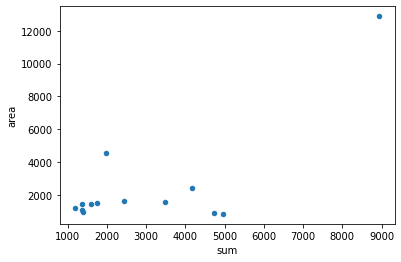

In [ ]:
#plot area vs sum for 1.5xTh
pr_15.plot(x='sum',y='area', kind='scatter')


In [ ]:
#pr_15 = pr_area[pr_area['amp']=='1.5xTh'].reset_index()
#sgl_15 = sgl_area[sgl_area['amp']=='1.5xTh'].reset_index()
ar1_list = []
ar2_list = []
sum=[]
for i in range(len(pr_2)):
  e1 = pr_2['electrode1'][i]
  e2 = pr_2['electrode2'][i]
  ar1 = 'NA'
  ar2 = 'NA'
  for elec1 in sgl_2['electrode1']:
    if(elec1==e1):
      ar1 = float((sgl_2[sgl_2['electrode1']==elec1]['area']))
      #print(ar1)
    if(elec1==e2):
      ar2 = float((sgl_2[sgl_2['electrode1']==elec1]['area']))
      #print(ar2)
  ar1_list.append(ar1)
  ar2_list.append(ar2)
  if (ar1=='NA' or ar2=='NA'):
    sum.append('NA')
  else: (sum.append(ar1 + ar2))
print(ar1_list)
print(ar2_list)
print(sum)
pr_2['area1'] = ar1_list
pr_2['area2'] = ar2_list
pr_2['sum'] = sum



[3986.9285714285716, 1304.9411764705883, 1304.9411764705883, 5810.166666666667, 5810.166666666667, 3146.0, 3146.0, 3146.0, 6758.3, 1280.7, 2487.5238095238096, 5588.846153846154, 3239.5263157894738, 3239.5263157894738, 'NA', 3489.8, 3489.8, 4173.6, 25401.0, 1409.3333333333333, 6816.4]
[2487.5238095238096, 1280.7, 'NA', 4411.9, 4749.16, 1304.9411764705883, 11012.5, 438.1, 4749.16, 6816.4, 13422.57142857143, 3658.3, 438.1, 4411.9, 3658.3, 5810.166666666667, 25401.0, 1409.3333333333333, 9077.666666666666, 4749.16, 4749.16]
[6474.452380952382, 2585.641176470588, 'NA', 10222.066666666666, 10559.326666666668, 4450.941176470588, 14158.5, 3584.1, 11507.46, 8097.099999999999, 15910.095238095239, 9247.146153846155, 3677.6263157894737, 7651.426315789473, 'NA', 9299.966666666667, 28890.8, 5582.933333333333, 34478.666666666664, 6158.493333333333, 11565.56]


In [ ]:
pr_2 = pr_2[(pr_2.area1 != 'NA')]
pr_2 = pr_2[(pr_2.area2 != 'NA')]
pr_2

,index,electrode1,electrode2,amp,area,area1,area2,sum
0,1,A01,E01,2xTh,3041.900000,3986.93,2487.52,6474.45
1,3,A08,D08,2xTh,2023.100000,1304.94,1280.7,2585.64
3,7,A10,E10,2xTh,1170.200000,5810.17,4411.9,10222.1
4,9,A10,F10,2xTh,1164.200000,5810.17,4749.16,10559.3
5,11,B07,A08,2xTh,8712.050000,3146,1304.94,4450.94
6,13,B07,B09,2xTh,9519.900000,3146,11012.5,14158.5
7,15,B07,D07,2xTh,1520.000000,3146,438.1,3584.1
8,17,C10,F10,2xTh,1644.500000,6758.3,4749.16,11507.5
9,19,D08,F08,2xTh,1341.700000,1280.7,6816.4,8097.1
10,21,E01,E03,2xTh,20268.315789,2487.52,13422.6,15910.1


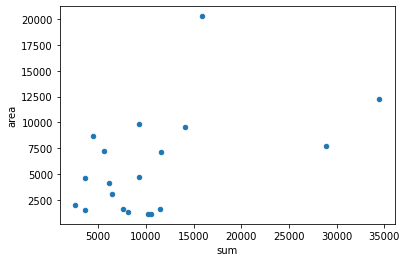

In [ ]:
#plot area vs sum for 1.5xTh
pr_2.plot(x='sum',y='area', kind='scatter')


Text(0, 0.5, 'Predicted Sum (pixels)')

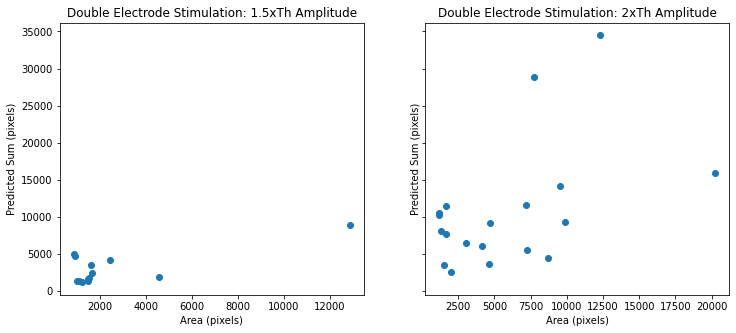

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

ax[0].scatter(pr_15['area'],pr_15['sum'])
ax[1].scatter(pr_2['area'],pr_2['sum'])

ax[0].set_title('Double Electrode Stimulation: 1.5xTh Amplitude')
ax[0].set_xlabel('Area (pixels)')
ax[0].set_ylabel('Predicted Sum (pixels)')
ax[1].set_title('Double Electrode Stimulation: 2xTh Amplitude')
ax[1].set_xlabel('Area (pixels)')
ax[1].set_ylabel('Predicted Sum (pixels)')

In [ ]:
#trying to see if the data fits to any function

x = pr_15['area']
y = pr_15['sum']


#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

#plt.plot(x, y, 'o')
#m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept
b, m = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()


#plt.plot(x, m*x + b)

TypeError: ignored

In [ ]:
pr_area

,electrode1,electrode2,amp,area
0,A01,E01,1.5xTh,2416.500000
1,A01,E01,2xTh,3041.900000
2,A08,D08,1.5xTh,993.800000
3,A08,D08,2xTh,2023.100000
4,A08,E08,1.5xTh,35.000000
5,A08,E08,2xTh,1316.105263
6,A10,E10,1.5xTh,927.900000
7,A10,E10,2xTh,1170.200000
8,A10,F10,1.5xTh,847.700000
9,A10,F10,2xTh,1164.200000


In [ ]:
sgl_area[sgl_area['electrode1']=='A01']['area']

0    2176.444444
1    3986.928571
Name: area, dtype: float64

In [ ]:
pr_area[0:2]

,electrode1,electrode2,amp,area
0,A01,E01,1.5xTh,2416.5
1,A01,E01,2xTh,3041.9


In [ ]:
ar1=0
ar2=0
sum=0
totalars=[]
for i, row in pr_area.iterrows():
  print(row['electrode1'][i] == sgl_area[sgl_area['electrode1'][i])




SyntaxError: ignored

In [ ]:
ar1=0
ar2=0
sum=0
totalars=[]
for i, row in pr_area.iterrows():
  if row['electrode1'][i] == sgl_area[sgl_area['electrode1']

    ar1 = sgl_area[sgl_area['electrode1']==row['electrode1']]['area']



In [ ]:
ar1=0
ar2=0
sum=0
totalars=[]
for index, row in pr_area.iterrows():
  ar = row[['electrode1']=='A01']['area']
ar

TypeError: ignored

In [ ]:
ar1=0
ar2=0
sum=0
totalars=[]
for row in pr_area.iterrows():
  ar1 = sgl_area[sgl_area['electrode1']==row['electrode1']]['area']
  ar2 = sgl_area[sgl_area['electrode2']==row['electrode2']]['area'] #can try switching too
  sum = ar1+ar2
  totalars.append(sum)
totalars

TypeError: ignored

In [ ]:
ar1=0
ar2=0
sum=0
totalars=[]
for row in pr_area[0:2]:
  ar1 = sgl_area[sgl_area['electrode1']==row['electrode1']]['area']
  ar2 = sgl_area[sgl_area['electrode2']==row['electrode2']]['area'] #can try switching too
  sum = ar1+ar2
  totalars.append(sum)
totalars

electrode1
electrode2
amp
area


In [ ]:
ar1=0
ar2=0
sum=0
totalars=[]
for row in pr_area[0:2]:
  ar1 = sgl_area[sgl_area['electrode1']==row['electrode1']]['area']
  ar2 = sgl_area[sgl_area['electrode2']==row['electrode2']]['area'] #can try switching too
  sum = ar1+ar2
  totalars.append(sum)
totalars

TypeError: ignored

In [ ]:
sgl_area

,electrode1,electrode2,amp,area
0,A01,,1.5xTh,2176.444444
1,A01,,2xTh,3986.928571
2,A08,,1.5xTh,869.600000
3,A08,,2xTh,1304.941176
4,A10,,1.5xTh,4299.000000
5,A10,,2xTh,5810.166667
6,B07,,1.5xTh,1115.800000
7,B07,,2xTh,3146.000000
8,B09,,1.5xTh,7825.600000
9,B09,,2xTh,11012.500000


In [ ]:
sub = pr_area[0:10]
sgl = sgl_area
pr_area[pr_area['electrode1']=='A01']['area']
pair = []

for e1 in sub['electrode1']:
  df1 = sub[(sub['electrode1']==e1)]
  pair = []
  for e2 in sub['electrode2']:
    df2 = sub[(sub['electrode2']==e2)]
    for a in sub['amp']:
        df3 = sub[(sub['amp']==a)]
        pair = [e1,e2]
        ar_pr = sub['area']
      for elec1 in sgl['electrode1']:
        ar1 = sgl['']


 df1 = sgl[(sgl['electrode1']==e1)]
  for fq in df1['freq'].unique():
    df2 = df1[(df1['freq']==fq)]
    for amp in df2['amp'].unique():
      image_list = []
      df3 = df2[df2['amp']==amp]



In [ ]:
sub = pr_area[0:10]
sgl = sgl_area
pr_area[pr_area['electrode1']=='A01']['area']
pair = []

for e1 in sub['electrode1']:
  pair = []
  for e2 in sub['electrode2']:
    pair = [e1,e2]
    for a in sub['amp']:
      for elec in sgl['electrode1']:
        for amp in sgl['amp']:
          if elec == e1 & amp == a: #get the area corresp to this electrode
            ar1 = sgl['area']
            sgl[sgl['electrode1']==e1]['area']






In [ ]:
if prs_area_df['electrode1']

In [ ]:
#checking that our new df only has the electrodes we need (in elec_arr)
np.sort(sgl_df['electrode1'].unique())==np.sort(elec_arr)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
matplotlib.rcParams["figure.dpi"] = 80

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

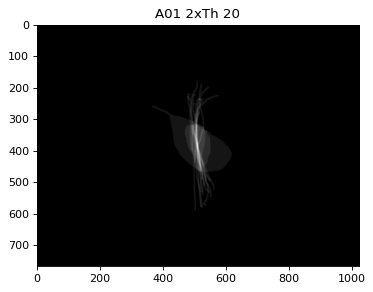

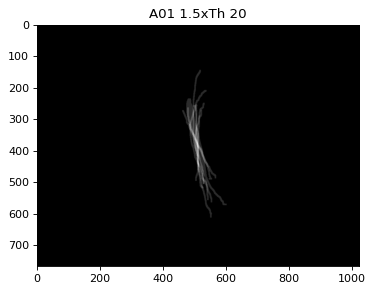

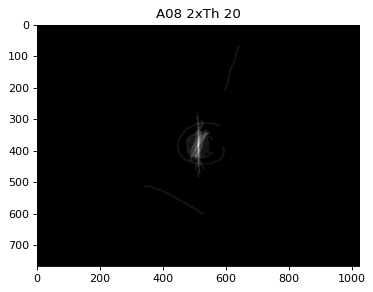

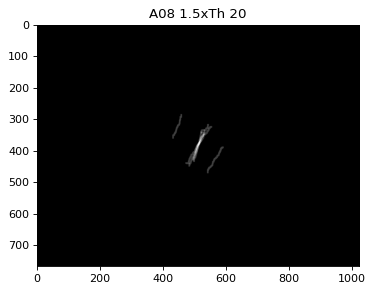

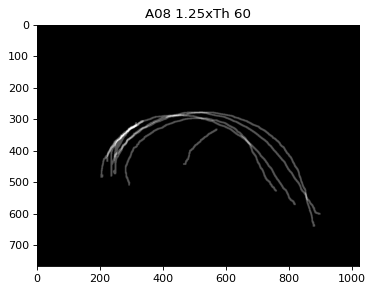

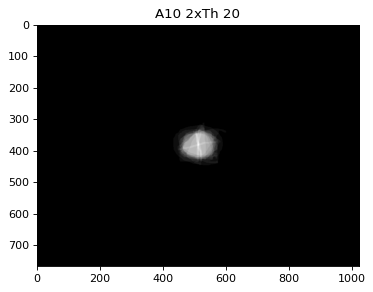

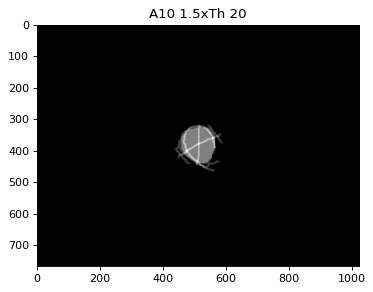

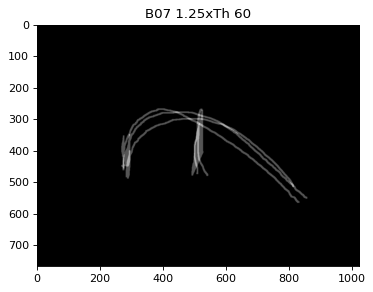

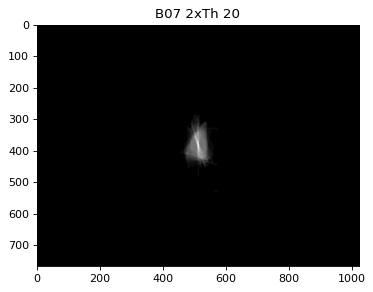

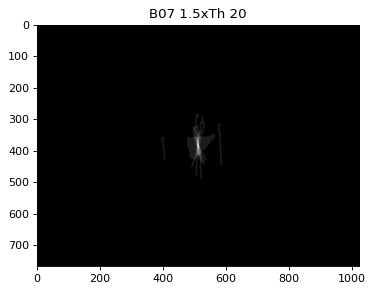

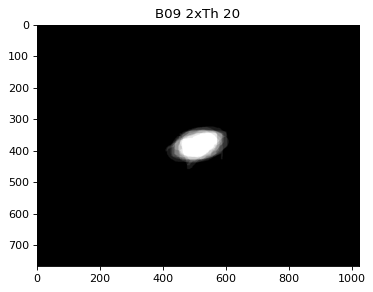

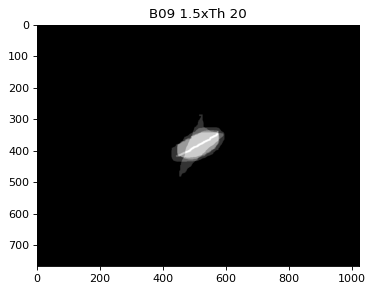

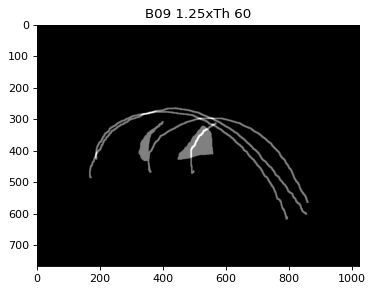

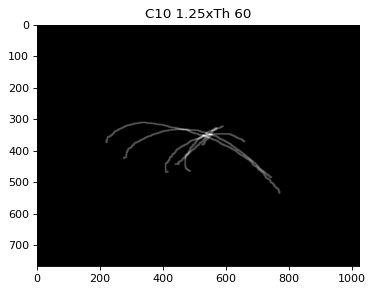

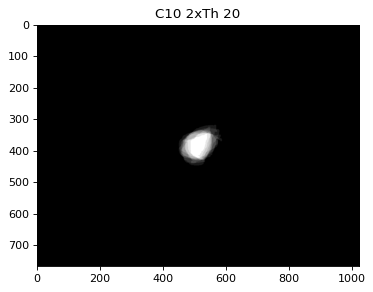

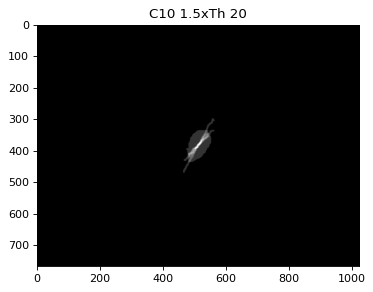

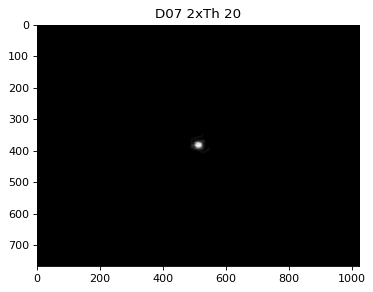

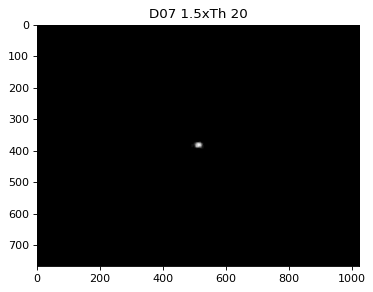

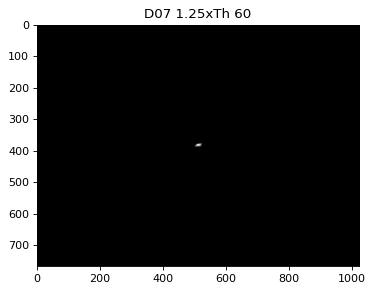

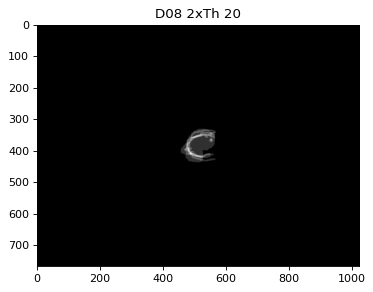

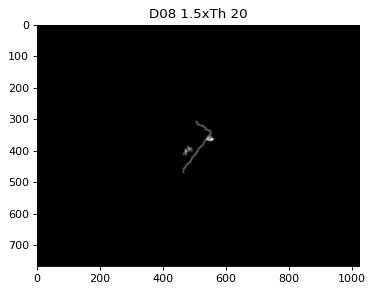

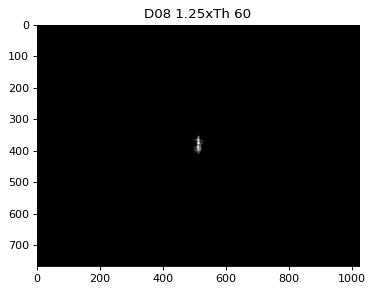

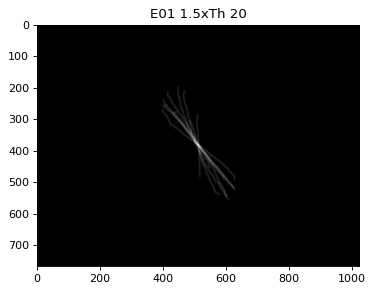

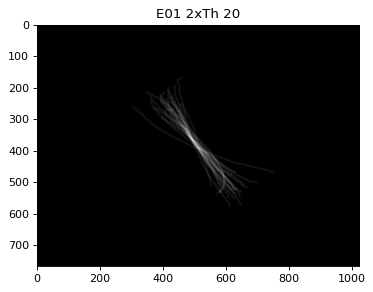

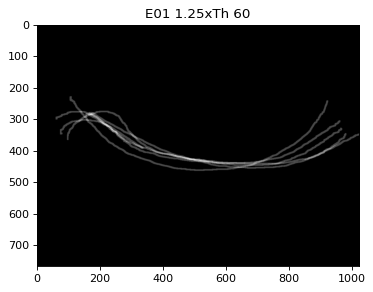

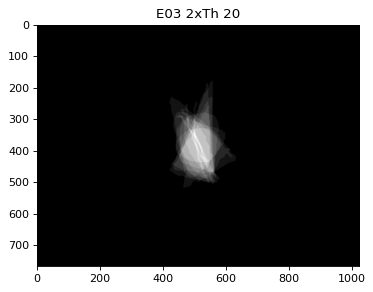

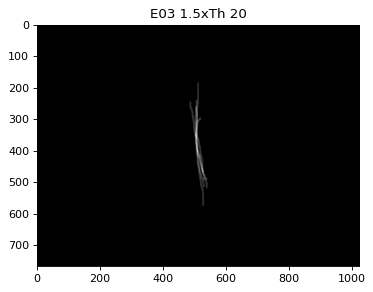

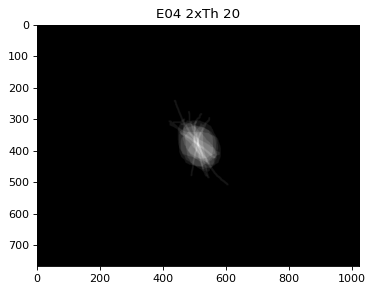

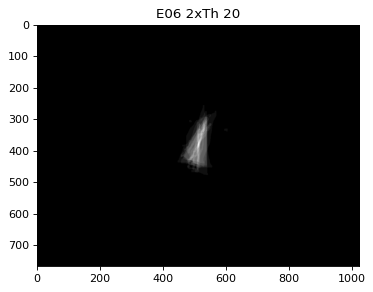

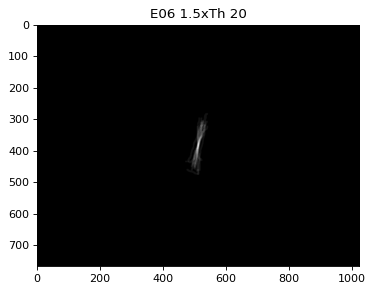

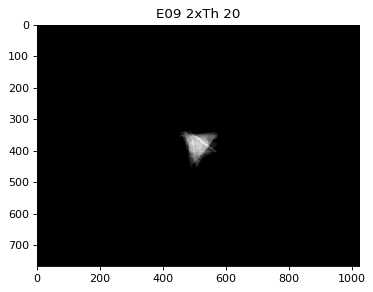

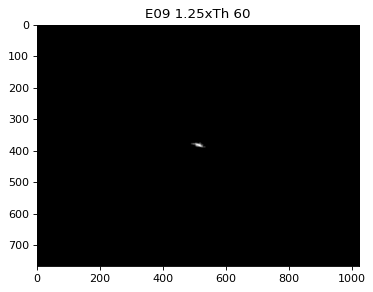

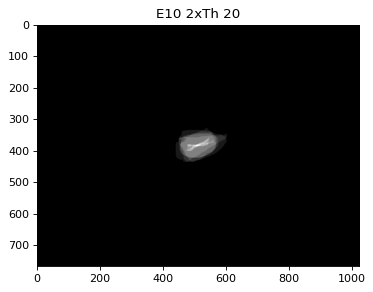

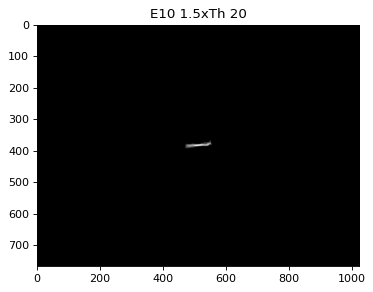

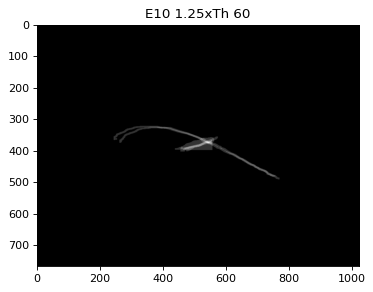

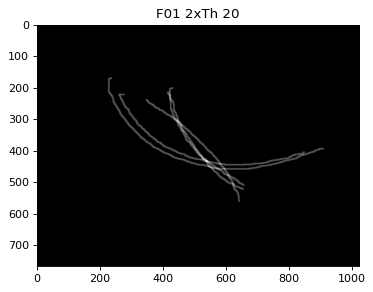

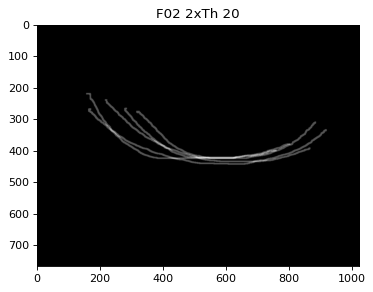

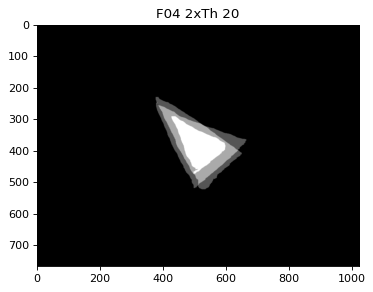

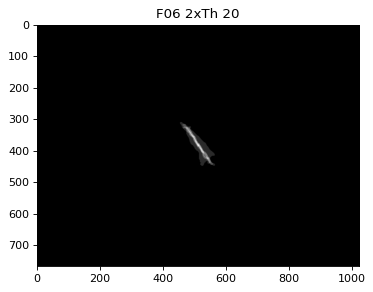

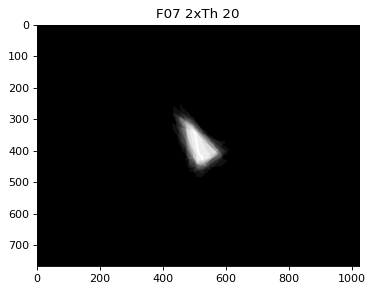

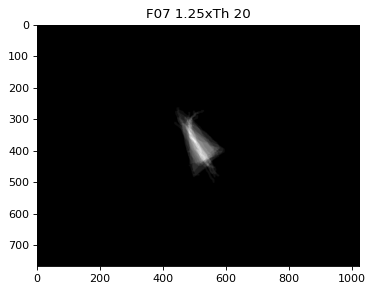

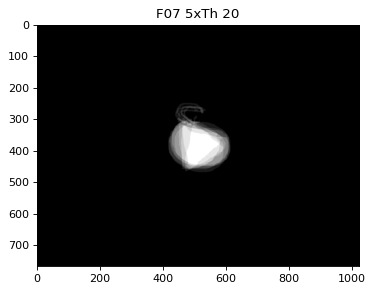

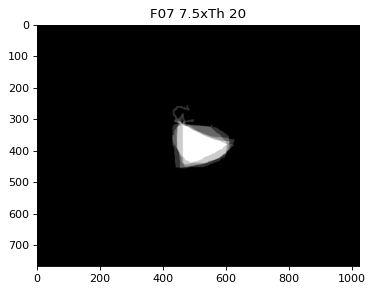

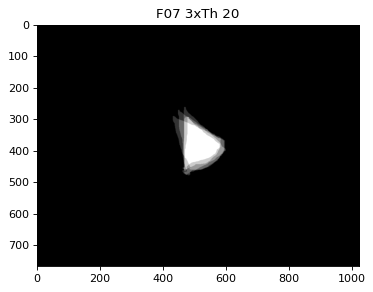

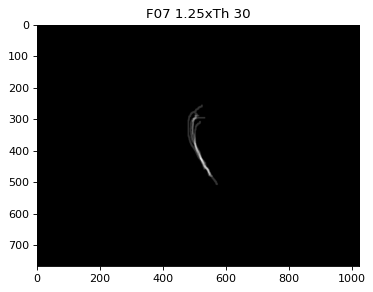

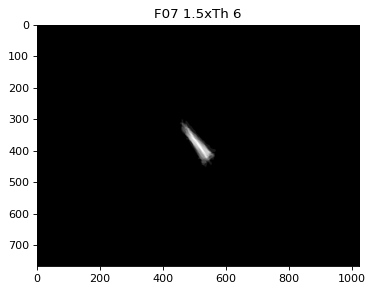

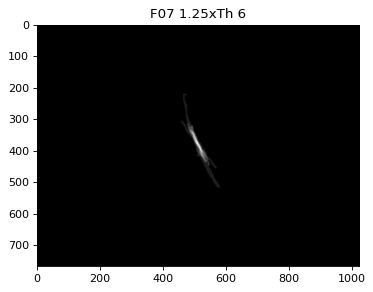

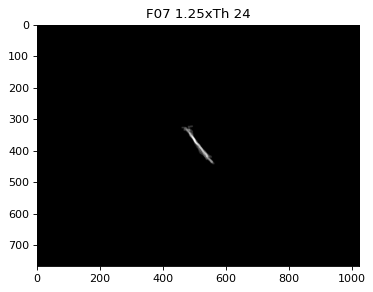

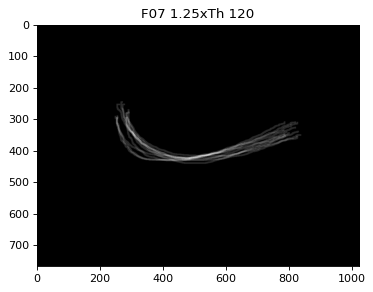

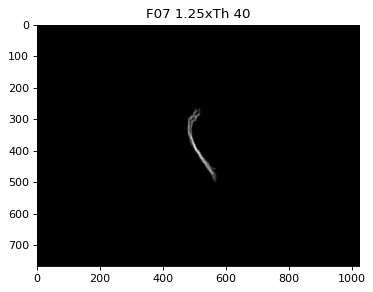

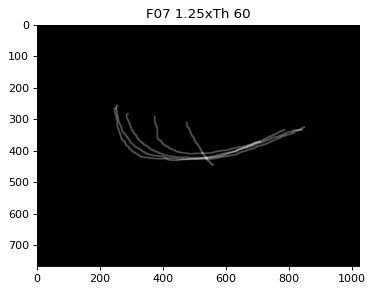

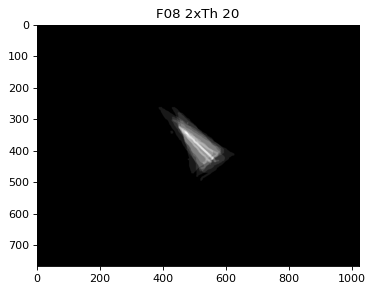

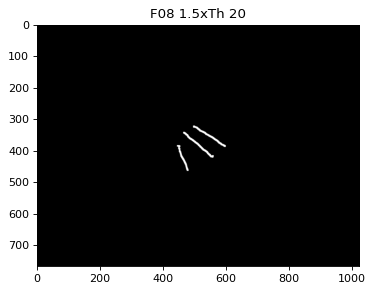

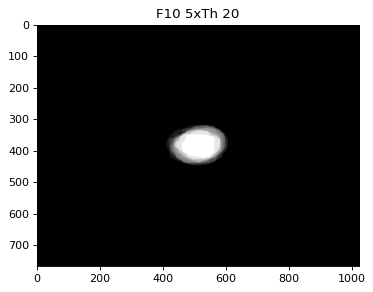

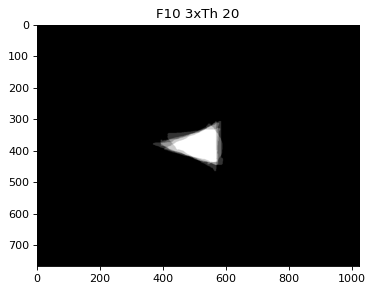

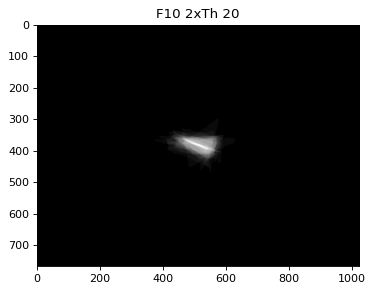

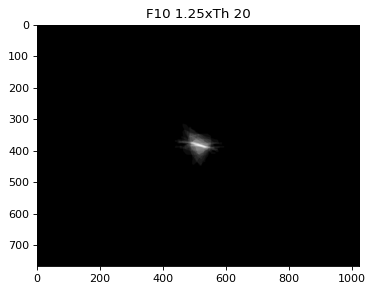

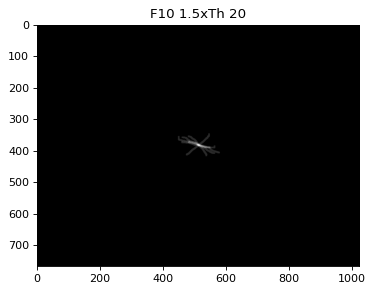

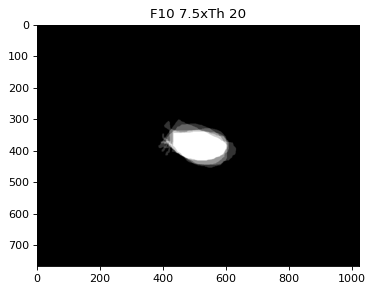

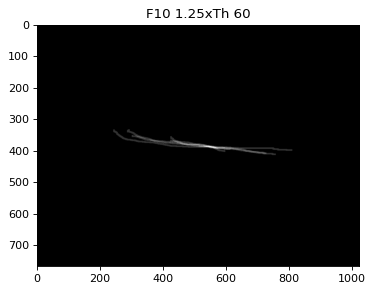

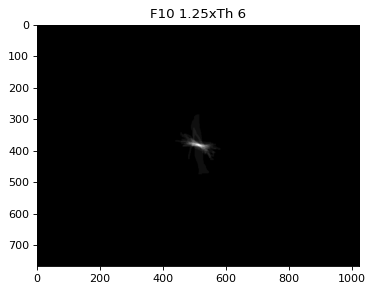

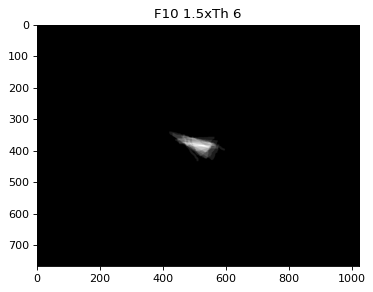

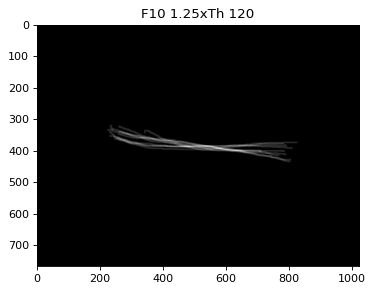

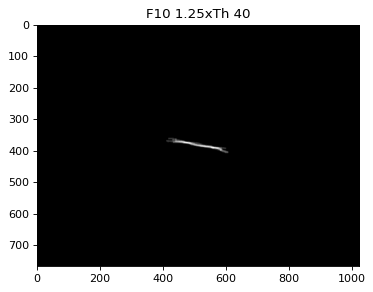

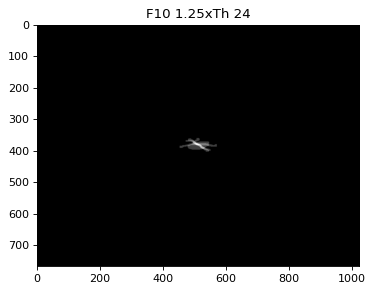

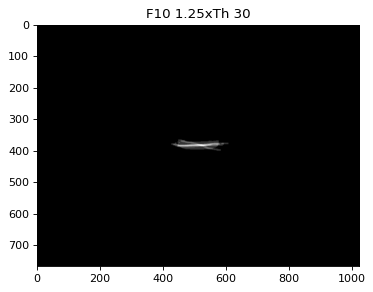

In [ ]:
np.set_printoptions(threshold=False)
sgl_df = sgl_df.sort_values('electrode1')
sgl = sgl_df
df = pd.DataFrame()
avg = []
for e1 in elec_arr:
  df1 = sgl[(sgl['electrode1']==e1)]
  for fq in df1['freq'].unique():
    df2 = df1[(df1['freq']==fq)]
    for amp in df2['amp'].unique():
      image_list = []
      df3 = df2[df2['amp']==amp]
      #print('debug',e1,fq,amp)
      #print(len(df3))
      for filename in df3['imgpath']:
        #print(filename)
        image_list.append(io.imread(filename,as_gray=True)) #list of img numpy arrays
      #print(len(image_list))
      avg = np.mean([center_image(img) for img in image_list], axis = 0)
      plt.figure()
      plt.title(e1 + " " + amp + " " + str(fq))
      plt.imshow(avg,cmap='gray')






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

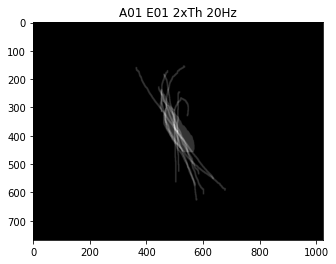

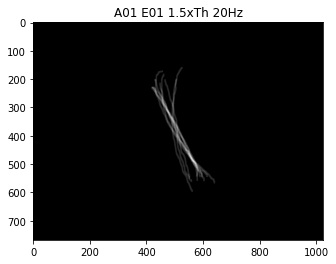

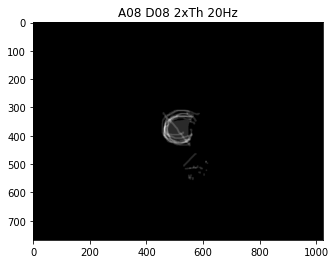

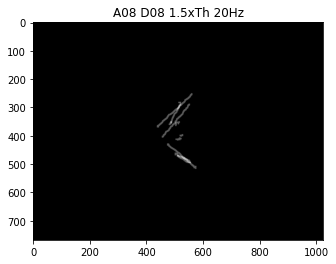

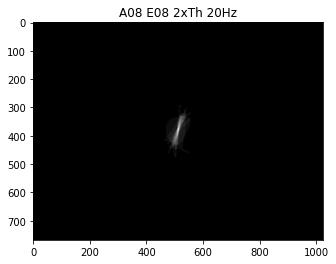

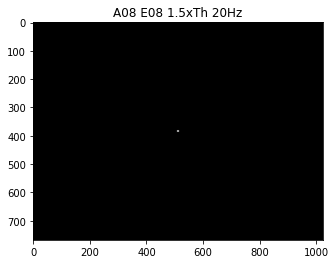

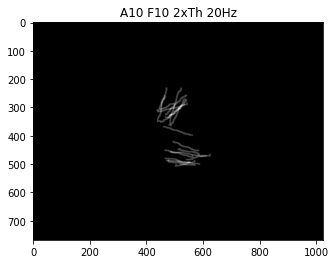

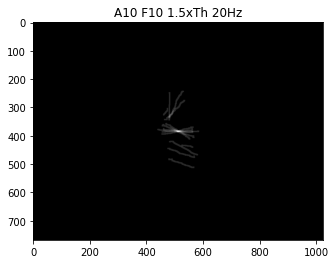

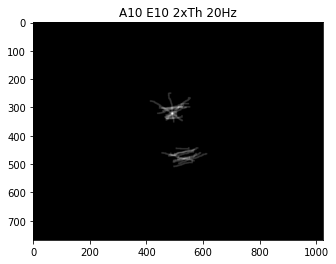

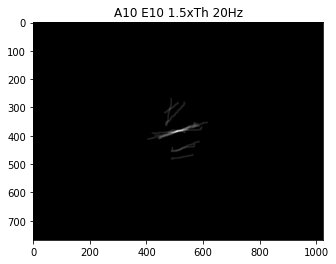

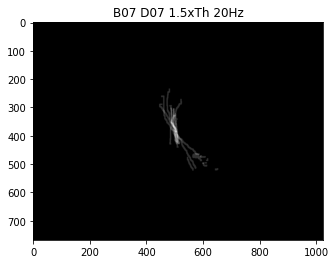

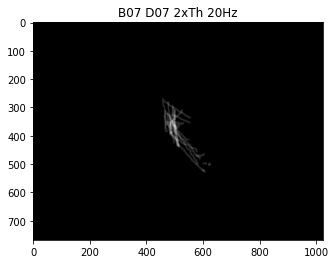

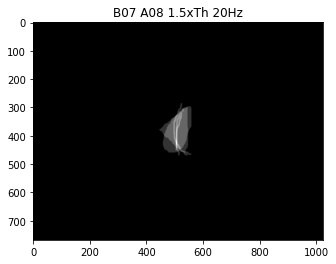

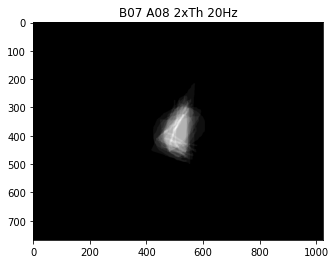

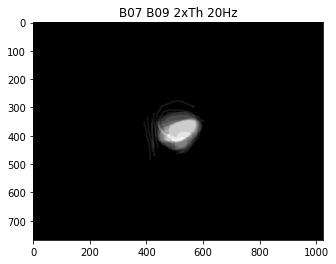

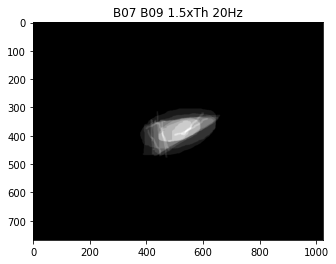

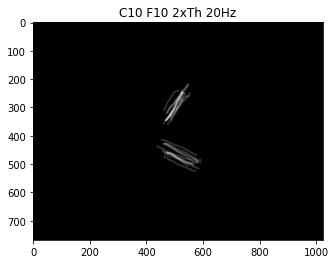

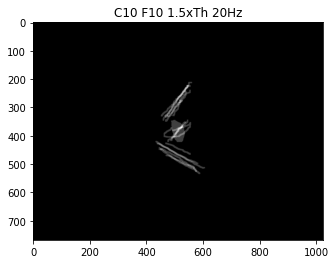

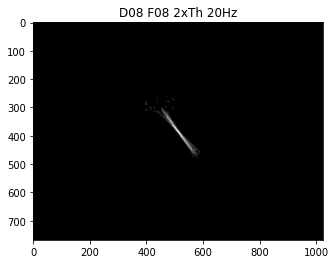

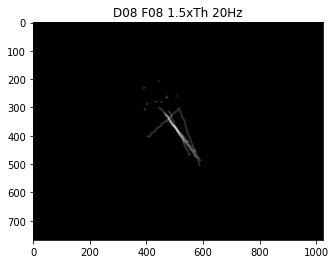

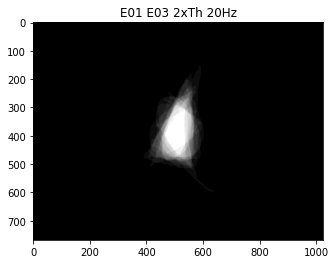

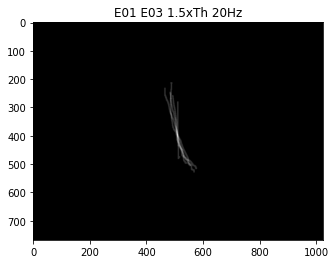

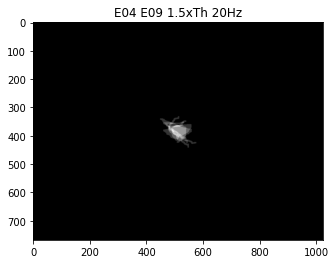

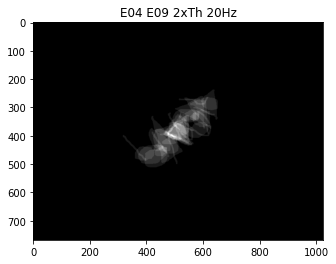

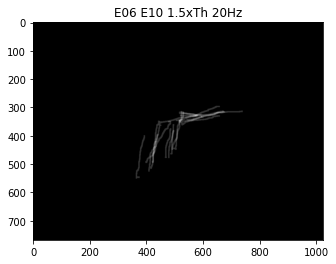

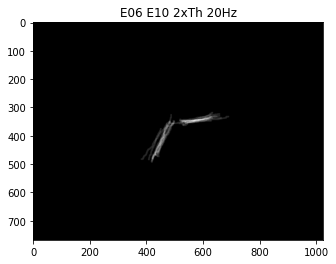

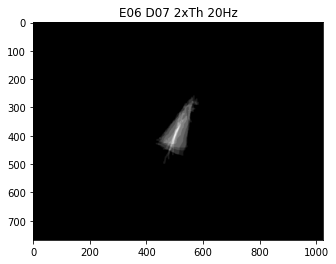

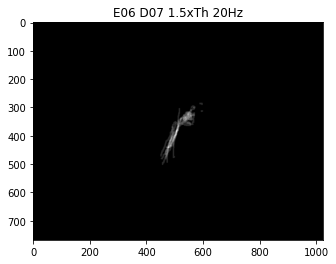

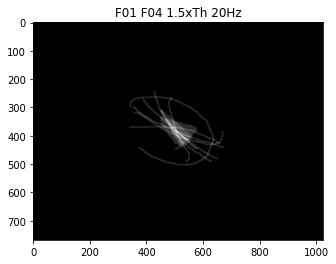

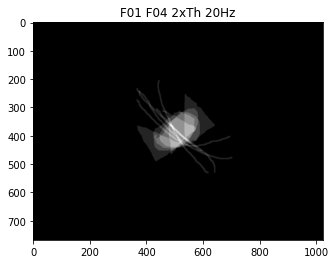

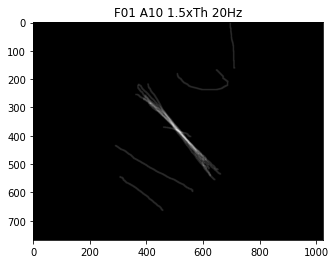

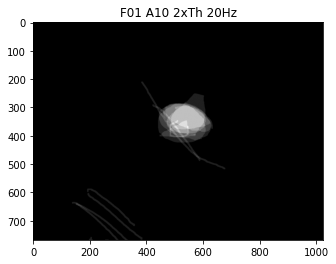

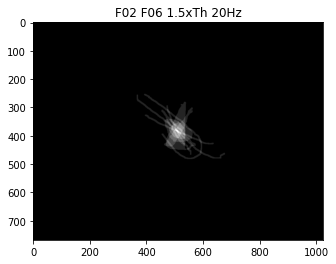

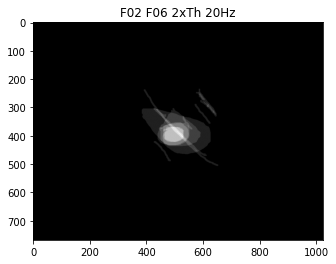

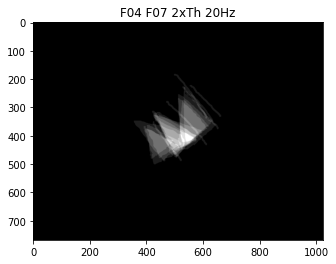

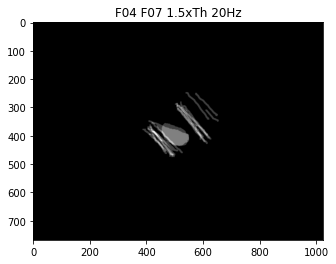

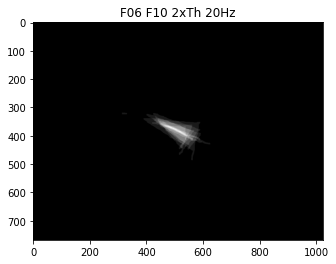

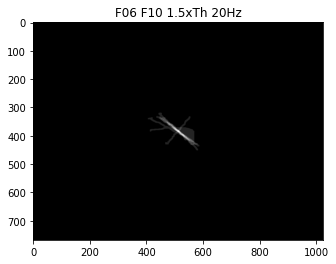

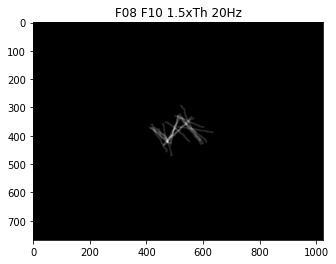

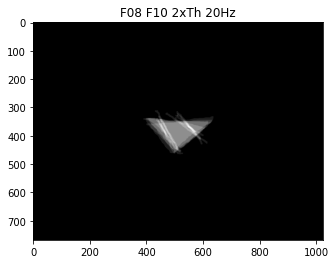

In [ ]:
#paired electrode images

np.set_printoptions(threshold=False)
paired = paired.sort_values('electrode1')
prd = paired
elec1_unq = pairs['electrode1'].unique()
df = pd.DataFrame()
avg = []
for e1 in elec1_unq:
  df1 = prd[(prd['electrode1']==e1)]
  for e2 in df1['electrode2'].unique():
    df1_p = df1[(df1['electrode2']==e2)]
    for fq in df1_p['freq'].unique():
      df2 = df1_p[(df1_p['freq']==fq)]
      for amp in df2['amp'].unique():
        image_list = []
        df3 = df2[df2['amp']==amp]
        #print('debug',e1,fq,amp)
        #print(len(df3))
        for filename in df3['imgpath']:
          #print(filename)
          image_list.append(io.imread(filename,as_gray=True)) #list of img numpy arrays
      #print(len(image_list))
        avg = np.mean([center_image(img) for img in image_list], axis = 0)
        plt.figure()
        plt.title(e1 + " " + e2 + " " + amp + " " + str(fq) + 'Hz')
        plt.imshow(avg,cmap='gray')

In [ ]:
#paired[['electrode1']=='A01']
 #subset[(subset['amp'] == 1.25) & (subset['freq']==20)]
paired[paired['electrode1']=='A01']

,image,electrode1,electrode2,vid_level,freq,pulse_dur,pulse_width,imgpath,amp,subject
4,20100506_103606_trial4.bmp,A01,E01,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001
5,20100506_103606_trial21.bmp,A01,E01,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001
6,20100506_103606_trial31.bmp,A01,E01,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001
7,20100506_103606_trial36.bmp,A01,E01,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001
8,20100506_103606_trial53.bmp,A01,E01,31,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,2xTh,52-001
55,20100506_103059_trial3.bmp,A01,E01,30,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,1.5xTh,52-001
56,20100506_103059_trial15.bmp,A01,E01,30,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,1.5xTh,52-001
57,20100506_103059_trial27.bmp,A01,E01,30,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,1.5xTh,52-001
58,20100506_103059_trial39.bmp,A01,E01,30,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,1.5xTh,52-001
59,20100506_103059_trial53.bmp,A01,E01,30,20,250,0.46,gdrive/My Drive/argus_shapes_raw/52-001/201005...,1.5xTh,52-001


In [ ]:
#plotting phosphenes on implants

In [ ]:
sgl__df = sgl_df
#sgl__df['image'] = image_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
amp_freq = sgl_df_new.groupby(['amp','freq']).size().reset_index().rename(columns={0:'count'})
amp_freq

,amp,freq,count
0,1.25,6.0,27
1,1.25,20.0,40
2,1.25,24.0,9
3,1.25,30.0,10
4,1.25,40.0,10
5,1.25,60.0,55
6,1.25,120.0,20
7,1.50,6.0,20
8,1.50,20.0,101
9,2.00,20.0,275


In [ ]:
#1
sgl_df_new = sgl__df

In [ ]:
#2a
sgl_df_new['electrode'] = sgl_df_new['electrode1'].str.replace('0','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#2b
sgl_df_new['amp'] = sgl_df_new['amp'].str.replace('xTh','')
#sgl_df_new['amp']

In [ ]:
amplistnum=[]
for a in sgl_df_new['amp']:
  amplistnum.append(float(a))

In [ ]:
sgl_df_new['amp'] = amplistnum

In [ ]:
freqlistflo=[]
for f in sgl_df_new['freq']:
  freqlistflo.append(float(f))
freqlistflo
sgl_df_new['freq'] = freqlistflo

In [ ]:
#3
sgl_df_new = sgl_df_new.drop(columns=['electrode1','electrode2'])
sgl_df_new['xrange'] = pd.Series([(-32.0, 32.0)] * len(sgl_df_new), index=sgl_df_new.index,
                              dtype=float)
sgl_df_new['yrange'] = pd.Series([(-24.0, 24.0)] * len(sgl_df_new), index=sgl_df_new.index,
                              dtype=float)


In [ ]:
#build implant for subject 4
implant = ArgusII(x=-1807, y=401, rot=np.deg2rad(-22.1), eye='RE')
model=AxonMapModel(loc_od=(16.3,2.37), xrange=(-32.0,32.0), yrange=(-24.0,24.0), thresh_percept = 1/np.sqrt(np.e))
#optic disk loc: 16.3, 2.37

Text(0.5, 1.0, '2xTh 20Hz')

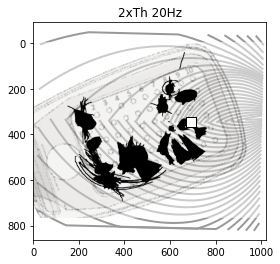

In [ ]:
subset = sgl_df_new #electrode names updated (0 removed), freq updated, amp updated
subset = subset.reset_index()

subset = subset[(subset['amp'] == 2) & (subset['freq']==20)]
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('2xTh 20Hz')

Text(0.5, 1.0, '1.5xTh 20Hz')

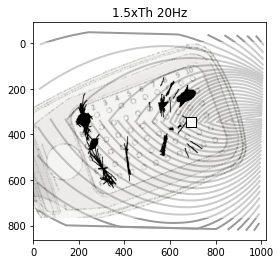

In [ ]:
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.5) & (subset['freq']==20)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.5xTh 20Hz')

Text(0.5, 1.0, '1.25xTh 20Hz')

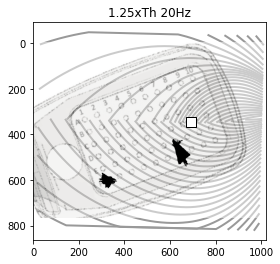

In [ ]:
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.25) & (subset['freq']==20)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.25xTh 20Hz')

Text(0.5, 1.0, '3xTh 20Hz')

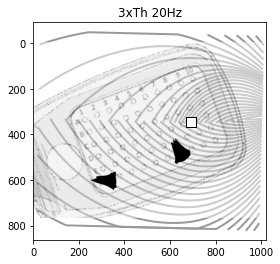

In [ ]:
subset = sgl_df_new
subset = subset[(subset['amp'] == 3) & (subset['freq']==20)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('3xTh 20Hz')

Text(0.5, 1.0, '5xTh 20Hz')

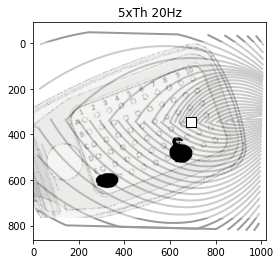

In [ ]:
subset = sgl_df_new
subset = subset[(subset['amp'] == 5) & (subset['freq']==20)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('5xTh 20Hz')

Text(0.5, 1.0, '7.5xTh 20Hz')

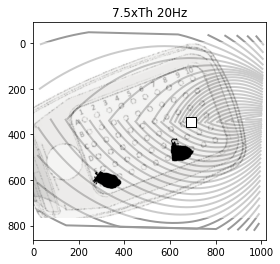

In [ ]:
subset = sgl_df_new
subset = subset[(subset['amp'] == 7.5) & (subset['freq']==20)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('7.5xTh 20Hz')

Text(0.5, 1.0, '1.25xTh 6Hz')

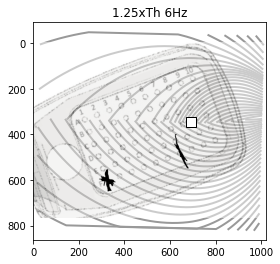

In [ ]:
#6Hz freq
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.25) & (subset['freq']==6)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.25xTh 6Hz')

Text(0.5, 1.0, '1.5xTh 6Hz')

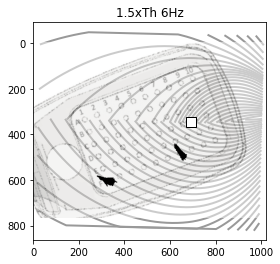

In [ ]:
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.5) & (subset['freq']==6)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.5xTh 6Hz')

Text(0.5, 1.0, '1.25xTh 24Hz')

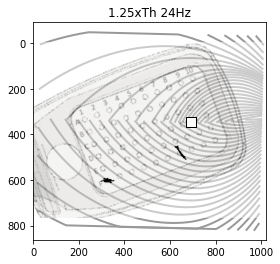

In [ ]:
#freq: 24Hz
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.25) & (subset['freq']==24)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.25xTh 24Hz')

Text(0.5, 1.0, '1.25xTh 30Hz')

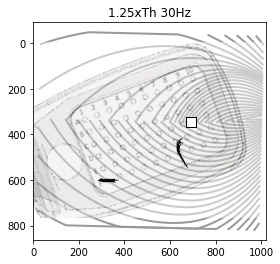

In [ ]:
#freq: 30Hz
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.25) & (subset['freq']==30)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.25xTh 30Hz')

Text(0.5, 1.0, '1.25xTh 40Hz')

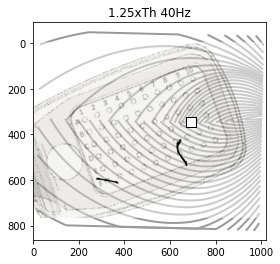

In [ ]:
#freq: 40Hz
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.25) & (subset['freq']==40)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.25xTh 40Hz')

Text(0.5, 1.0, '1.25xTh 60Hz')

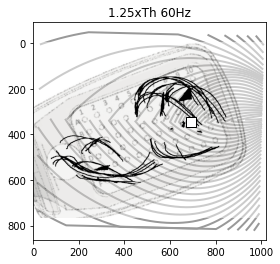

In [ ]:
#freq: 60Hz
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.25) & (subset['freq']==60)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.25xTh 60Hz')

Text(0.5, 1.0, '1.25xTh 120Hz')

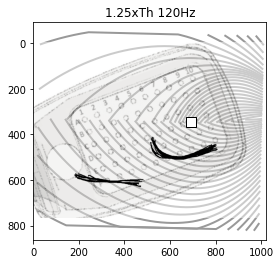

In [ ]:
#freq: 120Hz
subset = sgl_df_new
subset = subset[(subset['amp'] == 1.25) & (subset['freq']==120)]
subset = subset.reset_index()
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('1.25xTh 120Hz')

In [ ]:
#looking at 2019 dataset
data = fetch_beyeler2019(subjects="S4")

In [ ]:
data['electrode'].unique()

array(['E6', 'E1', 'A1', 'A5', 'E10', 'F8', 'A8', 'D8', 'E3', 'B9', 'E4',
       'E9', 'A10', 'F7', 'C4', 'B6', 'D3', 'F10', 'F1', 'C10', 'C8',
       'F6', 'D7', 'D5', 'A7', 'B7', 'F2', 'F9'], dtype=object)

In [ ]:
np.set_printoptions(threshold=np. inf)
subset['amp'].unique()

array(['2xTh', '1.5xTh', '1.25xTh', '5xTh', '7.5xTh', '3xTh'],
      dtype=object)

In [ ]:
subset['freq'].unique()

array([ 20,  60,  30,   6,  24, 120,  40])

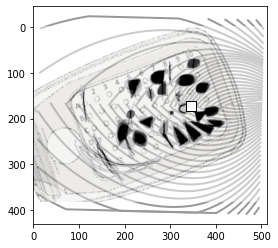

In [ ]:
#From Beyeler 2019 dataset, Subject 4 drawing
argus = ArgusII(x=-1807, y=401, rot=np.deg2rad(-22.1))
data = fetch_beyeler2019(subjects='S4')
data['img_x_dva'] = pd.Series([(-32.0, 32.0)] * len(data), index=data.index,
                              dtype=float)
data['img_y_dva'] = pd.Series([(-24.0, 24.0)] * len(data), index=data.index,
                              dtype=float)
model=AxonMapModel(loc_od=(16.3,2.37), xrange=(-32.0,32.0), yrange=(-24.0,24.0), thresh_percept = 1/np.sqrt(np.e))
plot_argus_phosphenes(data, argus, scale=0.50, axon_map=model)

Text(0.5, 1.0, '2xTh 20Hz')

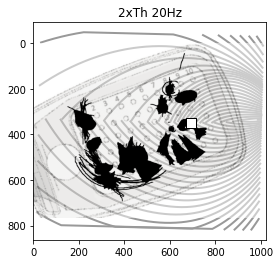

In [ ]:
subset = sgl_df_new #electrode names updated (0 removed), freq updated, amp updated
subset = subset.reset_index()

subset = subset[(subset['amp'] == 2) & (subset['freq']==20)]
p2p.viz.plot_argus_phosphenes(data=subset, argus=implant, scale = 0.5, axon_map=model)
matplotlib.pyplot.title('2xTh 20Hz')

Text(0.5, 1.0, 'Argus II')

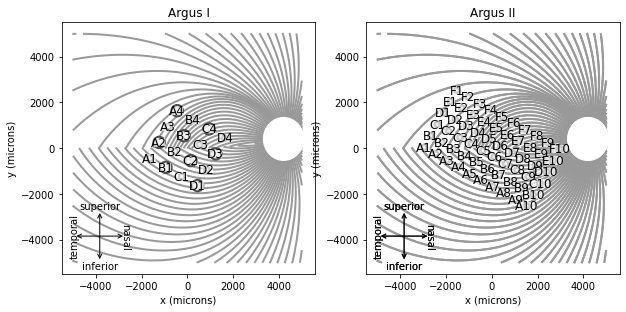

In [ ]:
#D07 worked well for subject 52-001...why?

fig, ax = plt.subplots(ncols=2, figsize=(10, 6))

# For illustrative purpose, also show the map of fiber
# bundles in the optic fiber layer:
model = AxonMapModel()
model.plot(ax=ax[0])
# Argus I is typically implanted at a 30-45deg angle:
ArgusI(rot=-0.52).plot(ax=ax[0], annotate=True)
ax[0].set_title('Argus I')

model.plot(ax=ax[1])
# Argus II is typically implanted at a 30-45deg angle:
ArgusII(rot=-0.52).plot(ax=ax[1], annotate=False)
ax[1].set_title('Argus II')
model.plot(ax=ax[1])
# Argus II is typically implanted at a 30-45deg angle:
ArgusII(rot=-0.52).plot(ax=ax[1], annotate=True)
ax[1].set_title('Argus II')

In [ ]:
#END (52-001)

In [ ]:
#subject 51009 does not have paired electrode data.

In [ ]:
subject = '12-005'
df_12005 = df_12005.drop(columns='Unnamed: 0')
df_12005 = df_12005.replace(np.nan, '', regex=True)
df = df_12005
imagefilepaths = glob('gdrive/My Drive/argus_shapes_raw/%s/*/*/*.bmp' % subject)

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
paired = df[df['electrode2']!='']

singles = df[df['electrode2']=='']
pairs = paired.groupby(['electrode1','electrode2']).size().reset_index().rename(columns={0:'count'})
#all the single electrodes we want (need to check these exist in either electrode1 or electrode 2 for the paired df)
elec1 = []
elec2 = []
elecs = []
for e1 in pairs['electrode1']:
  elec1.append(e1)

for e2 in pairs['electrode2']:
  elec2.append(e2)

elecs = elec1 + elec2
elec_arr = np.unique(elecs)

sgl_df = singles[singles['electrode1'].isin(elec_arr)]


In [ ]:
singles['electrode1'].unique()

array(['C08', 'C10', 'D08', 'D10', 'F02'], dtype=object)

In [ ]:
pairs

,electrode1,electrode2,count
0,B01,B03,5
1,C04,C08,5
2,C07,C10,5
3,C10,D10,5
4,D01,F02,5
5,D08,D10,5


In [ ]:
np.sort(elec_arr)

array(['B01', 'B03', 'C04', 'C07', 'C08', 'C10', 'D01', 'D08', 'D10',
       'F02'], dtype='<U3')

In [ ]:
np.sort(sgl_df['electrode1'].unique()) #B01, B03, C04, C07, D01 missing

array(['C08', 'C10', 'D08', 'D10', 'F02'], dtype=object)

In [ ]:
#checking that our new df only has the electrodes we need (in elec_arr)
np.sort(sgl_df['electrode1'].unique())==np.sort(elec_arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


False

can ignore the following scratch work

In [ ]:
img

array([[0, 0, ..., 0, 0],
       [0, 0, ..., 0, 0],
       ...,
       [0, 0, ..., 0, 0],
       [0, 0, ..., 0, 0]], dtype=uint8)

In [ ]:
np.shape(avg)

(768, 1024)

In [ ]:
#https://stackoverflow.com/questions/17291455/how-to-get-an-average-picture-from-100-pictures-using-pil

In [ ]:
matplotlib.rcParams["figure.dpi"] = 300 #want high res images

#all A01
df_A01 = df[(df['electrode1']=='A01') & (df['electrode2']=='')] #amps: 2x and 1.5x
df_A01_p = df[(df['electrode1']=='A01') & (df['electrode2']!='')] #amps: 2x and 1.5x #electrode2 = E01

#A01 s amp 1.5x
df_A01_15x = df_A01[df['amp']=='1.5xTh']
image_list = []
for filename in df_A01_15x['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
avg_15x = np.mean([center_image(img) for img in image_list], axis = 0)

#A01 s amp 2x
df_A01_2x = df_A01[df['amp']=='2xTh']
image_list = []
for filename in df_A01_2x['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
avg_2x = np.mean([center_image(img) for img in image_list], axis = 0)

#E01
df_E01 = df[(df['electrode1']=='E01') & (df['electrode2']=='')] #amps: 2x, 1.5x, 1.25x

#E01 s amp 1.5x
df_E01_15x = df_E01[df['amp']=='1.5xTh'] #E01 1.5x
image_list = []
for filename in df_E01_15x['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
avge_15x = np.mean([center_image(img) for img in image_list], axis = 0)

#E01 s amp 2x
df_E01_2x = df_E01[df['amp']=='2xTh'] #E01 2x
image_list = []
for filename in df_E01_2x['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
avge_2x = np.mean([center_image(img) for img in image_list], axis = 0)

#A01+E01 d amp 1.5x
df_A01_p_15x = df_A01_p[df['amp']=='1.5xTh']
image_list = []
for filename in df_A01_p_15x['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
avg_d_15x = np.mean([center_image(img) for img in image_list], axis = 0)

#A01+E01 d amp 2x
df_A01_p_2x = df_A01_p[df['amp']=='2xTh']
image_list = []
for filename in df_A01_p_2x['imgpath']:
 image_list.append(io.imread(filename,as_gray=True))
avg_d_2x = np.mean([center_image(img) for img in image_list], axis = 0)

fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(avg_15x, cmap='gray')
axs[0, 0].set_title('A01 1.5x')
axs[1, 0].imshow(avg_2x, cmap='gray')
axs[1, 0].set_title('A01 2x')
axs[0, 1].imshow(avg_d_15x, cmap='gray')
axs[0, 1].set_title('A01 E01 1.5x')
axs[1, 1].imshow(avg_d_2x, cmap='gray')
axs[1, 1].set_title("A01 E01 2x")
axs[0, 2].imshow(avge_15x, cmap='gray')
axs[0, 2].set_title("E01 1.5x")
axs[1, 2].imshow(avge_2x, cmap='gray')
axs[1, 2].set_title("E01 2x")

fig.tight_layout()
#plt.savefig('A01_E01.svg')
#how to save it as a high resolution image?

In [ ]:
#can del. paired electrode images

paired = paired.sort_values('electrode1')
prd = paired
elec1_unq = pairs['electrode1'].unique()
df = pd.DataFrame()
avg = []
for e1 in elec1_unq:
  df1 = prd[(prd['electrode1']==e1)]
  for e2 in df1['electrode2'].unique():
    df1_p = df1[(df1['electrode2']==e2)]
    for fq in df1_p['freq'].unique():
      df2 = df1_p[(df1_p['freq']==fq)]
      for amp in df2['amp'].unique():

        df3 = df2[df2['amp']==amp]
        #print('debug',e1,fq,amp)
        #print(len(df3))
        for img in df3['image']:
          #print(filename)
          #image_list.append(io.imread(filename,as_gray=True)) #list of img numpy arrays
      #print(len(image_list))
        size = np.sum(img > 0)
        avg = np.mean([center_image(img) for img in image_list], axis = 0)
        plt.figure()
        plt.title(e1 + " " + e2 + " " + amp + " " + str(fq) + 'Hz')
        plt.imshow(avg,cmap='gray')
#can skip
imgzero = io.imread(df['imgpath'][0])
plt.imshow(imgzero, cmap='gray')
imgprops = regionprops(imgzero)
imgprops[0].area
np.sum(imgzero > 0) #counts pixels